## The Renewable Energy Planning Database ('REPD') 2022 projects success analysing
### Goals:
1. Check if project success is correlated with Operator (Applicant)
2. Check if project success is correlated with Region
3. Check if project success is related with Technology Type
4. Check if project success is related with Capacity value
5. Find out the most significant parameters of project success

Data source was downloaded from https://www.data.gov.uk/ for educational purposes only.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.patches import ConnectionPatch
%matplotlib inline

### Data discovering

In [2]:
df = pd.read_csv('repd-july-2022-corrected.csv', encoding='windows-1252')
df.sample(5)

,Old Ref ID,Ref ID,Record Last Updated (dd/mm/yyyy),Operator (or Applicant),Site Name,Technology Type,Storage Type,Storage Co-location REPD Ref ID,Installed Capacity (MWelec),CHP Enabled,...,Appeal Refused,Appeal Granted,Planning Permission Granted,Secretary of State - Intervened,Secretary of State - Refusal,Secretary of State - Granted,Planning Permission Expired,Under Construction,Operational,Heat Network Ref
4471,NaN,5546,3/4/2015,Lightsource Renewable Energy,Eastern Site,Solar Photovoltaics,NaN,NaN,5.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3927,NaN,4775,8/5/2020,Lightsource BP,Bryn Henllys,Solar Photovoltaics,NaN,NaN,20.00,NaN,...,NaN,NaN,6/11/2018,NaN,NaN,NaN,6/11/2021,NaN,NaN,NaN
6290,NaN,8483,5/10/2022,JBM Solar Projects Limited,Belvoir Estate - Solar farm,Solar Photovoltaics,NaN,NaN,49.90,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7249,NaN,10937,6/14/2022,WM Morrisons Supermarkets Plc,Morrison - Roof mounted solar panels,Solar Photovoltaics,NaN,NaN,0.68,No,...,NaN,NaN,6/1/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6693,NaN,9592,9/14/2021,Trafford Green Hydrogen Limited,Manchester Road - Green Hydrogen Production Fa...,Hydrogen,NaN,9591,200.00,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,Ref ID,Installed Capacity (MWelec),RO Banding (ROC/MWh),CfD Capacity (MW),Turbine Capacity (MW),No. of Turbines,Height of Turbines (m),Y-coordinate,Heat Network Ref
count,7616.000000,7187.000000,280.000000,44.000000,2179.000000,2255.000000,641.000000,7.584000e+03,4.000000
mean,5058.165835,23.915400,1.295000,292.206818,2.386434,10.858537,121.592012,3.910862e+05,9288.000000
std,3221.175454,100.868244,0.307569,478.807266,1.628134,22.860713,46.571663,2.347857e+05,1.632993
min,1.000000,0.100000,0.000000,6.200000,0.050000,1.000000,30.000000,2.098500e+04,9286.000000
25%,2320.750000,2.200000,0.975000,20.300000,1.500000,2.000000,90.000000,1.961105e+05,9287.500000
50%,4640.500000,6.000000,1.400000,47.250000,2.300000,5.000000,125.000000,3.395565e+05,9288.000000
75%,7476.250000,20.000000,1.400000,427.000000,3.000000,11.000000,149.500000,5.572258e+05,9288.500000
max,11719.000000,3000.000000,2.000000,2400.000000,32.000000,400.000000,350.000000,1.202671e+06,9290.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Old Ref ID                               3918 non-null   object 
 1   Ref ID                                   7616 non-null   int64  
 2   Record Last Updated (dd/mm/yyyy)         7616 non-null   object 
 3   Operator (or Applicant)                  7536 non-null   object 
 4   Site Name                                7613 non-null   object 
 5   Technology Type                          7616 non-null   object 
 6   Storage Type                             811 non-null    object 
 7   Storage Co-location REPD Ref ID          471 non-null    object 
 8   Installed Capacity (MWelec)              7187 non-null   float64
 9   CHP Enabled                              2796 non-null   object 
 10  RO Banding (ROC/MWh)                     280 non

In [5]:
df["Development Status (short)"].value_counts()

Operational                    2782
Awaiting Construction          1471
Application Refused             952
Application Submitted           805
Application Withdrawn           482
Revised                         411
Abandoned                       340
Under Construction              190
Planning Permission Expired      91
Appeal Withdrawn                 47
Decommissioned                   31
Pre-Planning                      5
No Application Required           4
Scoping                           3
Appeal Refused                    2
Name: Development Status (short), dtype: int64

In [6]:
df["Operator (or Applicant)"].value_counts()

Private Developer                             284
Lightsource Renewable Energy                  175
Scottish and Southern Energy (SSE)             82
Renewable Energy Systems (RES)                 76
Anesco                                         54
                                             ... 
Devon Light and Power                           1
Good Energy (previously nPower Renewables)      1
Falck Renewables/RDC                            1
TNEI Services Ltd                               1
Melksham Calne Green Limited                    1
Name: Operator (or Applicant), Length: 3567, dtype: int64

In [7]:
df["Region"].value_counts()

Scotland                1651
South West              1071
Eastern                  753
South East               721
East Midlands            638
North West               543
Wales                    527
Yorkshire and Humber     466
Northern Ireland         389
West Midlands            381
North East               274
Offshore                 103
London                    98
Name: Region, dtype: int64

In [8]:
df["Storage Type"].value_counts()

Stand-alone Storage                  503
Co-located with RE                   277
Co-located with fossil fuel plant     31
Name: Storage Type, dtype: int64

In [9]:
df["Technology Type"].value_counts()

Solar Photovoltaics                 3066
Wind Onshore                        2276
Battery                              800
Anaerobic Digestion                  300
Landfill Gas                         291
Biomass (dedicated)                  223
EfW Incineration                     194
Small Hydro                          142
Advanced Conversion Technologies     130
Wind Offshore                         80
Large Hydro                           30
Tidal Barrage and Tidal Stream        28
Sewage Sludge Digestion               12
Pumped Storage Hydroelectricity       11
Shoreline Wave                         8
Hydrogen                               6
Biomass (co-firing)                    5
Geothermal                             5
Liquid Air Energy Storage              4
Hot Dry Rocks (HDR)                    2
Flywheels                              1
Fuel Cell (Hydrogen)                   1
Compressed Air Energy Storage          1
Name: Technology Type, dtype: int64

## Data preprocessing

Prepare a list of column names for father analysing

In [10]:
df.columns.values

array(['Old Ref ID', 'Ref ID', 'Record Last Updated (dd/mm/yyyy)',
       'Operator (or Applicant)', 'Site Name', 'Technology Type',
       'Storage Type', 'Storage Co-location REPD Ref ID',
       'Installed Capacity (MWelec)', 'CHP Enabled',
       'RO Banding (ROC/MWh)', 'FiT Tariff (p/kWh)', 'CfD Capacity (MW)',
       'Turbine Capacity (MW)', 'No. of Turbines',
       'Height of Turbines (m)', 'Mounting Type for Solar',
       'Development Status', 'Development Status (short)',
       'Are they re-applying (New REPD Ref)',
       'Are they re-applying (Old REPD Ref) ', 'Address', 'County',
       'Region', 'Country', 'Post Code', 'X-coordinate', 'Y-coordinate',
       'Planning Authority', 'Planning Application Reference',
       'Appeal Reference', 'Secretary of State Reference',
       'Type of Secretary of State Intervention', 'Judicial Review',
       'Offshore Wind Round', 'Planning Application Submitted',
       'Planning Application Withdrawn', 'Planning Permission Refused'

In [11]:
work_column_names =[
    'Operator (or Applicant)', 
    'Technology Type', 'Storage Type', 'Installed Capacity (MWelec)', 'CHP Enabled', 
    'Region',
    'succeed']

Prepare a list of Status types which will be recognized as succeed project

In [12]:
df["Development Status (short)"].unique()

array(['Operational', 'Application Withdrawn', 'Application Refused',
       'Abandoned', 'Revised', 'Appeal Withdrawn',
       'Planning Permission Expired', 'Under Construction',
       'Awaiting Construction', 'Decommissioned',
       'No Application Required', 'Application Submitted',
       'Appeal Refused', 'Pre-Planning', 'Scoping'], dtype=object)

In [13]:
succeed_status = ['Operational', 'Under Construction', 
                  'Awaiting Construction', 'Application Submitted']

Clean "Development Status (short)", 
create a target column "is_succeed" base on succeed_status,
combine new db with columns for father analysing

In [14]:
def succeed_status_creator (row):
    if row["Development Status (short)"] in succeed_status:
        return 1
    else:
        return 0

In [15]:
df = df.dropna(subset=["Development Status (short)"], axis=0)

In [16]:
df['succeed'] = df.apply(lambda row: succeed_status_creator(row), axis=1)
df2 = df[work_column_names].copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Operator (or Applicant)      7536 non-null   object 
 1   Technology Type              7616 non-null   object 
 2   Storage Type                 811 non-null    object 
 3   Installed Capacity (MWelec)  7187 non-null   float64
 4   CHP Enabled                  2796 non-null   object 
 5   Region                       7615 non-null   object 
 6   succeed                      7616 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 416.6+ KB


Drop rows with missed 'Operator (or Applicant)' or 'Region'

In [17]:
df2 = df2.dropna(subset=['Operator (or Applicant)', 'Region'], axis=0)

Filling out missed values

In [18]:
# Fill numeric columns with the mean
num_vars = df2.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df2[col].fillna((df[col].mean()), inplace=True)

In [19]:
# Drop rows with zero Capacity
df2.drop(df2[df2['Installed Capacity (MWelec)'] == 0].index, inplace=True)

In [20]:
df2[['Storage Type', 'CHP Enabled']] = df2[
    ['Storage Type', 'CHP Enabled']].fillna("No")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7535 entries, 0 to 7615
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Operator (or Applicant)      7535 non-null   object 
 1   Technology Type              7535 non-null   object 
 2   Storage Type                 7535 non-null   object 
 3   Installed Capacity (MWelec)  7535 non-null   float64
 4   CHP Enabled                  7535 non-null   object 
 5   Region                       7535 non-null   object 
 6   succeed                      7535 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 470.9+ KB


Convert "CHP Enabled" to Key (0, 1) value

In [21]:
def chp_to_key (row):
    if row["CHP Enabled"] == 'No':
        return 0
    else:
        return 1
    
df2['CHP Enabled'] = df.apply(lambda row: chp_to_key(row), axis=1)
df2.sample(5)

,Operator (or Applicant),Technology Type,Storage Type,Installed Capacity (MWelec),CHP Enabled,Region,succeed
6156,Pathfinder Clean Energy UK Dev Limited,Solar Photovoltaics,No,15.0,0,Eastern,1
1425,NESF (formerly Green Energy Networks),Solar Photovoltaics,No,1.0,1,West Midlands,1
3893,University of St Andrews,Biomass (dedicated),No,6.5,1,Scotland,1
832,Glenfarm,EfW Incineration,No,3.0,0,Northern Ireland,0
173,EQTEC (Gaia Power),Biomass (dedicated),No,49.8,1,North East,1


### Total capacity values 

In [22]:
print(f"Succeed capacity (MWelec) - {(df2['Installed Capacity (MWelec)'].where(df2['succeed'] == 1)).sum()}")
print(f"Total capacity (MWelec) - {df2['Installed Capacity (MWelec)'].sum()}")

Succeed capacity (MWelec) - 132006.6872102407
Total capacity (MWelec) - 181368.4766119382


## Visual analysing dependances

In [23]:
def visualizer_helper (df2, group_by_name, drop_limit):
    
    df3 = df2.copy()
    df3["not_succeed"] = df3["succeed"].apply(lambda x: 0 if x == 1 else 1 )
    df3["succeed_capacity"] = df3.apply(
        lambda row: row["Installed Capacity (MWelec)"] if row.succeed == 1 else 0, axis=1 )
    df3["not_succeed_capacity"] = df3.apply(
        lambda row: row["Installed Capacity (MWelec)"] if row.succeed == 0 else 0, axis=1 )

    dff = df3.groupby([group_by_name]).sum().reset_index()
    
    total_succeed_capacity = dff['succeed_capacity'].sum()
    total_capacity = dff['Installed Capacity (MWelec)'].sum()

    dff["all_projects"] =  dff["not_succeed"] + dff["succeed"]
    dff["succeed_rate"] = dff["succeed"] / dff["all_projects"] * 100
    dff["capacity_succeed_rate"] = dff["succeed_capacity"] / dff["Installed Capacity (MWelec)"] * 100
    dff["capacity_succeed_part"] = dff["succeed_capacity"] / total_succeed_capacity * 100
    
    
    dff = dff.drop(dff[dff.all_projects < drop_limit].index)

    dff = dff.sort_values('Installed Capacity (MWelec)', ascending=False)
    
    print()
    print(f"Total succeed capacity (100%): {round(total_succeed_capacity, 2)} MWelec")
    print(f"Total capacity (100%): {round(total_capacity, 2)} MWelec")
    print()
    
    succeed_droped_capacity_sum = round(dff['succeed_capacity'].sum(), 2)
    all_droped_capacity_sum = round(dff['Installed Capacity (MWelec)'].sum(), 2)
    
    print(f"Succeed droped capacity " + 
          f"({round(succeed_droped_capacity_sum / total_succeed_capacity *100)}%): " +
          f"{succeed_droped_capacity_sum} MWelec")
    print(f"Total droped capacity " + 
          f"({round(all_droped_capacity_sum / total_capacity *100)}%): " +
          f"{all_droped_capacity_sum} MWelec")
    
    return dff

In [24]:
def visualizer (dff, group_by_name):
    
    labels = dff[group_by_name].tolist()
    succeed_means = dff["succeed_capacity"].tolist()
    not_succeed_means= dff["not_succeed_capacity"].tolist()
    width = 0.8  

    fig, ax = plt.subplots()
    plt.xticks(rotation=90)

    fig.set_figwidth(14)
    fig.set_figheight(8)


    ax.bar(labels, succeed_means, width,  label='Succeed')
    ax.bar(labels, not_succeed_means, width,
           label='Not succeed', 
           bottom=succeed_means)

    ax.set_ylabel('Total projects capacity (MWelec)')


    ax2 = ax.twinx()

    color = 'b'
    ax2.set_ylabel('Succeed projects amount (pcs)', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    projects_amount = dff["succeed"].tolist()
    l=[i for i in range(len(projects_amount))]

    ax2.plot(l, projects_amount,'b--')
    ax2.plot(l, projects_amount,'b^')

    for a, b in zip(l, projects_amount):
        ax2.text(a, b, b, ha='center', va='bottom', fontsize=12)


    ax.set_title(
        f'Influence {group_by_name} parameter on project success')
    ax.legend()

    plt.show()

#### Operator (or Applicant)


Total succeed capacity (100%): 132006.69 MWelec
Total capacity (100%): 181368.48 MWelec

Succeed droped capacity (24%): 31720.37 MWelec
Total droped capacity (23%): 42557.92 MWelec


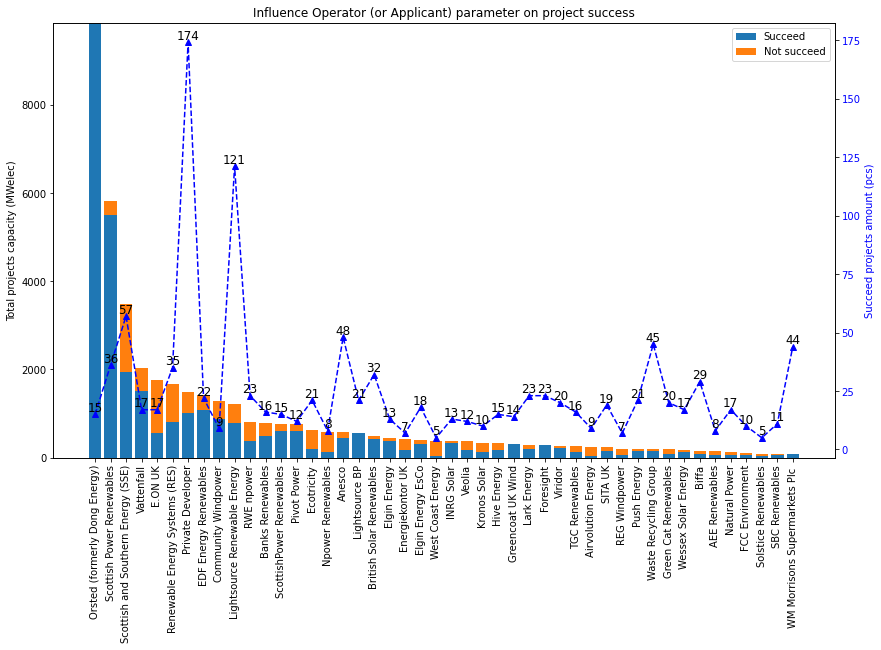

In [25]:
group_by_name = "Operator (or Applicant)"
drop_limit_all_projects = 15
    
dff = visualizer_helper (df2, group_by_name, drop_limit_all_projects)
visualizer (dff, group_by_name)

#### Technology Type


Total succeed capacity (100%): 132006.69 MWelec
Total capacity (100%): 181368.48 MWelec

Succeed droped capacity (99%): 130330.63 MWelec
Total droped capacity (99%): 179415.12 MWelec


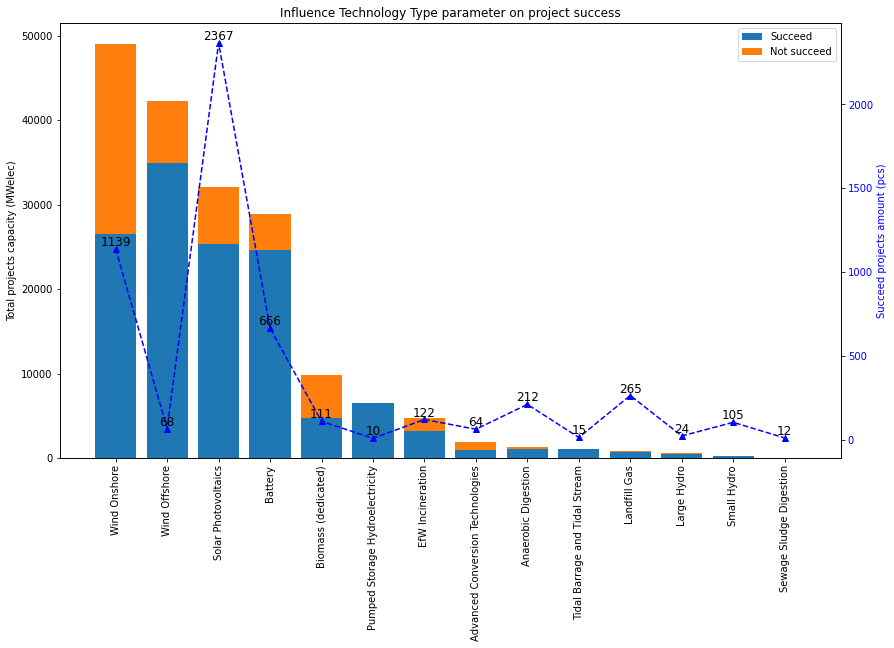

In [26]:
group_by_name = "Technology Type"
drop_limit_all_projects = 10
    
dff = visualizer_helper (df2, group_by_name, drop_limit_all_projects)
visualizer (dff, group_by_name)

#### Region


Total succeed capacity (100%): 132006.69 MWelec
Total capacity (100%): 181368.48 MWelec

Succeed droped capacity (100%): 132006.69 MWelec
Total droped capacity (100%): 181368.48 MWelec


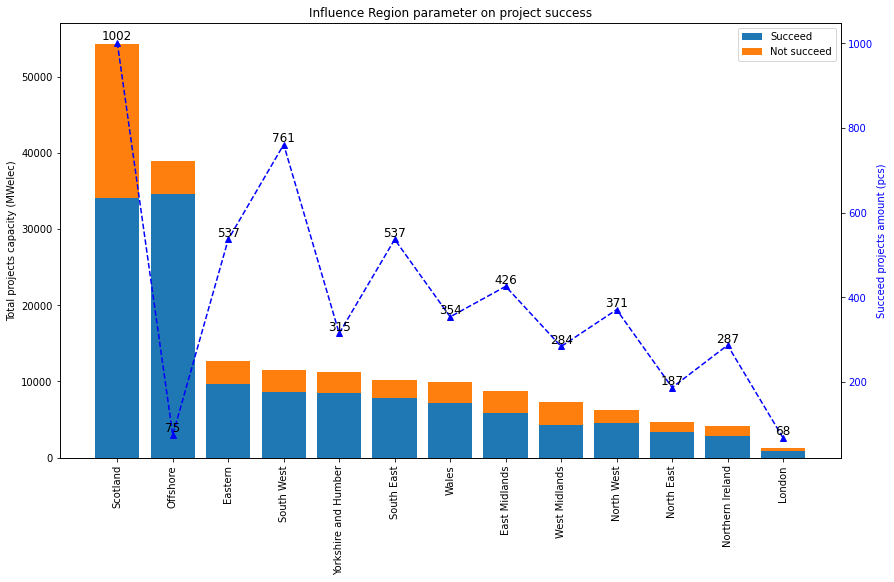

In [27]:
group_by_name = "Region"
drop_limit_all_projects = 10
    
dff = visualizer_helper (df2, group_by_name, drop_limit_all_projects)
visualizer (dff, group_by_name)

#### Capacity value

In [28]:
def capacity_group_name(capacity, group_limits):
    
    top = sorted(i for i in group_limits if i >= capacity)[0]
    bottom = sorted(i for i in group_limits if i < capacity)[-1]
    
    return f"from {bottom} to {top} MWelec"

In [29]:
def capacity_round(capacity, group_limits):
    
    return sorted(i for i in group_limits if i >= capacity)[0]

In [30]:
def visualizer_capacity_helper(group_limits, df2):
    
    df3 = df2.copy()
    df3["not_succeed"] = df3["succeed"].apply(lambda x: 0 if x == 1 else 1 )
    df3["succeed_capacity"] = df3.apply(
        lambda row: row["Installed Capacity (MWelec)"] if row.succeed == 1 else 0, axis=1 )
    df3["not_succeed_capacity"] = df3.apply(
        lambda row: row["Installed Capacity (MWelec)"] if row.succeed == 0 else 0, axis=1 )

    max_succeed_capacity = round(
        df3["Installed Capacity (MWelec)"].max(), 1)
    min_succeed_capacity = round(
        (df3['Installed Capacity (MWelec)'].where(df3['Installed Capacity (MWelec)'] > 0)).min(), 1)

    df3["capacity_group"] = df3["Installed Capacity (MWelec)"].apply(
        lambda x: capacity_round(x, group_limits))

    dff = df3.groupby(["capacity_group"]).sum().reset_index()
    
    dff["capacity_group_name"] = dff["capacity_group"].apply(
    lambda x: capacity_group_name(x, group_limits))

    dff["succeed_capacity_rate"] =  round(dff["succeed_capacity"] / dff["Installed Capacity (MWelec)"] * 100)
    
    
    succeed_droped_capacity_sum = round(dff['succeed_capacity'].sum(), 2)
    all_droped_capacity_sum = round(dff['Installed Capacity (MWelec)'].sum(), 2)
    total_succeed_capacity = dff['succeed_capacity'].sum()
    total_capacity = dff['Installed Capacity (MWelec)'].sum()
    
    print()
    print(f"Total succeed capacity (100%): {round(total_succeed_capacity, 2)} MWelec")
    print(f"Total capacity (100%): {round(total_capacity, 2)} MWelec")
    print()
    
    print(f"Succeed droped capacity " + 
          f"({round(succeed_droped_capacity_sum / total_succeed_capacity *100)}%): " +
          f"{succeed_droped_capacity_sum} MWelec")
    print(f"Total droped capacity " + 
          f"({round(all_droped_capacity_sum / total_capacity *100)}%): " +
          f"{all_droped_capacity_sum} MWelec")

    return dff


In [31]:
def visualizer_capacity (dff):
    
    labels = dff["capacity_group_name"].tolist()
    succeed_means = dff["succeed"].tolist()
    not_succeed_means= dff["not_succeed"].tolist()
    width = 0.9  

    fig, ax = plt.subplots()
    plt.xticks(rotation=90)

    fig.set_figwidth(14)
    fig.set_figheight(8)


    ax.bar(labels, succeed_means, width,  label='Succeed')
    ax.bar(labels, not_succeed_means, width,
           label='Not succeed', 
           bottom=succeed_means)

    ax.set_ylabel('Total projects amount (pcs)')

    
    ax2 = ax.twinx()

    color = 'b'
    ax2.set_ylabel('Succeed capacity rate (%)', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    projects_amount = dff["succeed_capacity_rate"].tolist()
    l=[i for i in range(len(projects_amount))]

    ax2.plot(l, projects_amount,'b--')
    ax2.plot(l, projects_amount,'b^')

    for a, b in zip(l, projects_amount):
        ax2.text(a, b, b, ha='center', va='bottom', fontsize=12)
        

    ax.set_title(
        f'Influence Installed Capacity (MWelec) parameter on project success')
    ax.legend()

    plt.show()


Total succeed capacity (100%): 132006.69 MWelec
Total capacity (100%): 181368.48 MWelec

Succeed droped capacity (100%): 132006.69 MWelec
Total droped capacity (100%): 181368.48 MWelec


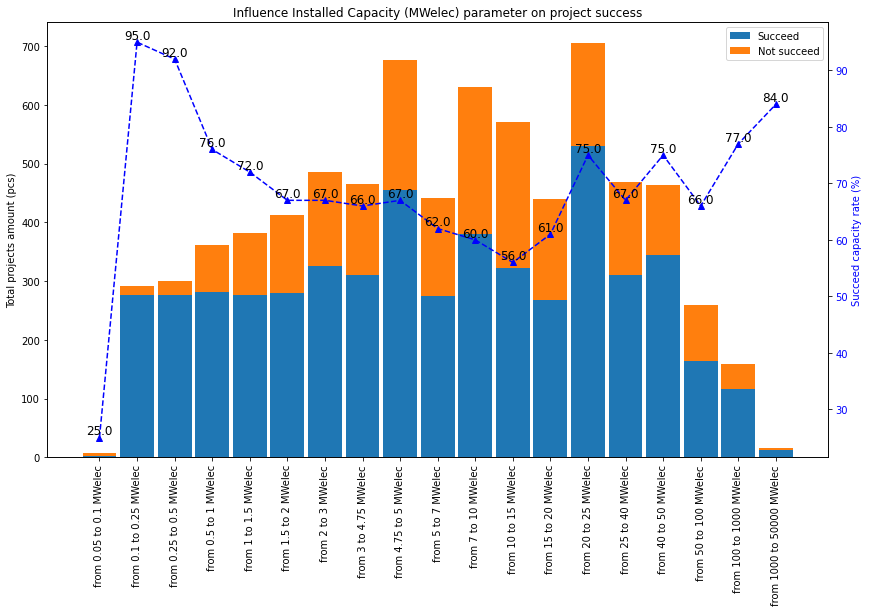

In [32]:
group_limits = [0.05, 0.1, 0.25, 0.5, 
                1, 1.5, 2, 3, 4.75, 5, 7, 10, 15,
                20, 25, 40, 50, 
                100, 
                1000, 
                50000]

dff = visualizer_capacity_helper(group_limits, df2)
visualizer_capacity(dff)

## Most significant parameters of project success

Taking into account that huge amount of parameters leads to a decreasing prediction score of the model, try to reduce the amount of unique value "Operator (or Applicant)". Based on diagram Dependency Project  Success from "Operator (or Applicant)", each "start up" company provides insignificant amount of Capacity so the real "Operator (or Applicant)" name may be replaced with “Start Up” value depending on some project amount limit.

In [33]:
# Rename columns
df2.columns = ['operator', 'tech_type', 'st_type', 'capacity', 'chp', 'region', 'is_succeed']

In [34]:
# Set limits for total projects amount
limit = 3

# Get Start Up names
all_operators = df2["operator"].value_counts()
start_ups = all_operators[all_operators < limit].index.tolist()

In [35]:
# Replace all Operator name with “StartUp” value if it is in Start Ups list

def rename_by_limit (row, start_ups):
    if row["operator"] in start_ups:
        return "StartUp"
    else:
        return row["operator"]
    
df3 = df2.copy()
df3['operator'] = df3.apply(lambda row: rename_by_limit(row, start_ups), axis=1)
df3.sample(5)

,operator,tech_type,st_type,capacity,chp,region,is_succeed
4774,SBC Renewables,Solar Photovoltaics,No,3.5,1,North West,1
4756,Stirling Council,Solar Photovoltaics,No,5.0,1,Scotland,0
5177,Low Carbon,Solar Photovoltaics,No,44.0,1,Eastern,1
2039,StartUp,Wind Offshore,No,630.0,1,Offshore,1
4239,Hill Power,Wind Onshore,No,2.0,1,Northern Ireland,1


In [36]:
# Dummy the categorical variables
cat_vars = df3.select_dtypes(
    include=['object']).copy().columns

print(cat_vars)

df4 = df3.copy()
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df4 = pd.concat(
        [df4.drop(var, axis=1), pd.get_dummies(df4[var], prefix=var, prefix_sep='_', drop_first=True)], 
        axis=1)
    
df4.sample(5)

Index(['operator', 'tech_type', 'st_type', 'region'], dtype='object')


,capacity,chp,is_succeed,operator_A7 Energy,operator_ABO Wind,operator_ABO Wind NI,operator_AEE Renewables,operator_AMEC,operator_AMP Energy Services Limited,operator_AR Partners,...,region_North East,region_North West,region_Northern Ireland,region_Offshore,region_Scotland,region_South East,region_South West,region_Wales,region_West Midlands,region_Yorkshire and Humber
6869,23.9154,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2292,16.0000,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6359,49.9000,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6692,23.9154,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2495,16.0000,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
# Check if data is balanced by target
df4['is_succeed'].value_counts()

1    5204
0    2331
Name: is_succeed, dtype: int64

In [38]:
# Split variables
y = df4['is_succeed']
X = df4.drop(['is_succeed'], axis=1)

# Scale data
cols_to_scale = ["capacity"]
scaler = StandardScaler()
df4[cols_to_scale] = scaler.fit_transform(df4[cols_to_scale])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.03, random_state=42)

model = LogisticRegression(
        random_state = 42, C = 1, penalty='l2', solver='saga')
model.fit(X_train, y_train.ravel())

# Predict using model
y_preds = model.predict(X_test)

# Score using model
print(classification_report(y_test.ravel(), y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.72      1.00      0.84       163

    accuracy                           0.72       227
   macro avg       0.36      0.50      0.42       227
weighted avg       0.52      0.72      0.60       227



C:\Users\Tymofii\.conda\envs\ml-learn\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Tymofii\.conda\envs\ml-learn\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tymofii\.conda\envs\ml-learn\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tymofii\.conda\envs\ml-learn\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-de

In [39]:
# Find the most significant parameters values

def coef_weights(coefficients, X_train):
    
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = coefficients
    coefs_df['abs_coefs'] = np.abs(coefficients)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

# Use the function
coef_df = coef_weights(model.coef_.T, X_train)

# A quick look at the top results
coef_df.head(15)

,est_int,coefs,abs_coefs
513,st_type_No,0.019745,0.019745
508,tech_type_Solar Photovoltaics,0.016385,0.016385
414,operator_StartUp,0.012518,0.012518
1,chp,0.008319,0.008319
0,capacity,0.007061,0.007061
491,tech_type_Battery,0.004591,0.004591
523,region_South West,0.004339,0.004339
522,region_South East,0.003314,0.003314
515,region_Eastern,0.002946,0.002946
501,tech_type_Landfill Gas,0.002632,0.002632


Model confirmed strong dependences of project success from parameters described above. Also interesting result is in negative dependance on parameter which shows if project supposes to have extra storage. It may be caused by extra capital expense relative to similar projects without this option.

## Discovery relations between Private Developers, StartUps and Others

In [40]:
# Prepare data for visualise  relations between Private Developers, StartUps and others
operatorGroups = ['StartUp', 'Private Developer', 'Others']

# Add extra columns
df4 = df3.copy()
df4["not_succeed"] = df3["is_succeed"].apply(lambda x: 0 if x == 1 else 1 )
df4["succeed_capacity"] = df3.apply(
        lambda row: row["capacity"] if row["is_succeed"] == 1 else 0, axis=1 )
df4["not_succeed_capacity"] = df3.apply(
        lambda row: row["capacity"] if row["is_succeed"] == 0 else 0, axis=1 )

In [41]:
def data_prepare_helper(df4, key):
    df5 = df4.copy()
    
    df = df5.drop(df5[df5['operator'] != key].index).groupby(["tech_type"]).sum()
    df = df.sort_values('capacity', ascending=False).reset_index()
    
    return df

def data_others_prepare_helper(df4, key):
    df5 = df4.copy()
    
    df = df5.drop(df5[df5['operator'] == key[0]].index)
    df = df.drop(df[df['operator'] == key[1]].index)
    df = df.groupby(["tech_type"]).sum().sort_values('capacity', ascending=False).reset_index()
    
    return df

In [42]:
# StartUps data
dfStartUps = data_prepare_helper(df4, 'StartUp')
dfStartUps.head(5)

,tech_type,capacity,chp,is_succeed,not_succeed,succeed_capacity,not_succeed_capacity
0,Wind Offshore,22339.500000,32,33,8,17183.500000,5156.0000
1,Wind Onshore,19181.127800,826,484,434,10466.697000,8714.4308
2,Battery,17835.721003,161,351,58,15599.090003,2236.6310
3,Solar Photovoltaics,14540.747202,795,1111,270,11717.138602,2823.6086
4,Biomass (dedicated),6157.592400,78,89,79,2481.692400,3675.9000


In [43]:
# Private developers data
dfPrivateDev = data_prepare_helper(df4, 'Private Developer')
dfPrivateDev.head(5)

,tech_type,capacity,chp,is_succeed,not_succeed,succeed_capacity,not_succeed_capacity
0,Wind Onshore,596.2770,131,82,77,282.7116,313.5654
1,Solar Photovoltaics,565.4640,54,64,21,469.7640,95.7000
2,Battery,236.3616,2,10,0,236.3616,0.0000
3,Biomass (dedicated),69.7700,1,6,5,3.5700,66.2000
4,Anaerobic Digestion,16.2000,5,9,3,12.7000,3.5000


In [44]:
# Others data
dfOthers = data_others_prepare_helper(df4, ['Private Developer','StartUp' ])
dfOthers.head(5)

,tech_type,capacity,chp,is_succeed,not_succeed,succeed_capacity,not_succeed_capacity
0,Wind Onshore,29242.807800,1066,573,577,15784.607800,13458.200000
1,Wind Offshore,19931.600000,38,35,4,17743.600000,2188.000000
2,Solar Photovoltaics,17020.268201,1218,1192,393,13097.245801,3923.022400
3,Battery,10854.879603,181,305,76,8823.671603,2031.208001
4,Biomass (dedicated),3558.000000,16,16,25,2204.400000,1353.600000


In [45]:
def rename_tech_type_by_limit(row, limit):
    if row['is_succeed'] > limit:
        return row["tech_type"]
    else:
        return "Others"
    
    
def most_used_tech_types(df, limit):
    
    df2 = df.copy()
    
    # Rename under limit to other
    df2['tech_type'] = df2.apply(lambda row: rename_tech_type_by_limit(row, limit), axis=1)
    
    df2 = df2.groupby(["tech_type"]).sum().reset_index()
    df2 = df2.sort_values('is_succeed', ascending=False)
    
    return df2['is_succeed'].to_numpy(), df2['tech_type'].to_numpy()


def relation_visualizer_helper(
    data, labels, row, column, title, angle):

    wedges, texts = axs[row, column].pie(
        data, 
        wedgeprops=dict(width=1), 
        startangle=angle,
        explode=[0.05]*len(data),
        shadow=True)

    bbox_props = dict(
        boxstyle="square,pad=0.4", 
        fc="w", 
        ec="k", 
        lw=0.72)
    kw = dict(
        arrowprops=dict(arrowstyle="-"),
        bbox=bbox_props, 
        zorder=0, 
        va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        axs[row, column].annotate(
            labels[i], 
            xy=(x, y), 
            xytext=(1.35*np.sign(x), 1.4*y),
            horizontalalignment=horizontalalignment, **kw)

    axs[row, column].set_title(title)

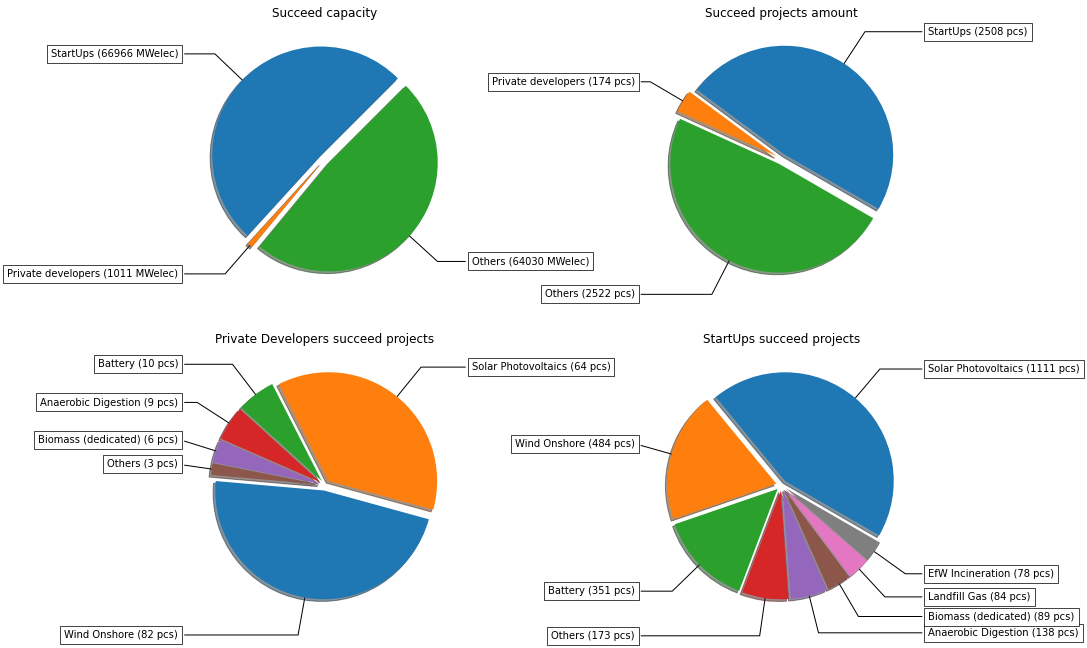

In [46]:
# Make figure and axes
fig, axs = plt.subplots(
    2, 2, 
    figsize=(15, 11), 
    subplot_kw=dict(aspect="equal"))


# Visualise succeed capacity Private Developers, StartUps and Others
data = [
    round(dfStartUps['succeed_capacity'].sum()), 
    round(dfPrivateDev['succeed_capacity'].sum()), 
    round(dfOthers['succeed_capacity'].sum())
]
labels = [f"StartUps ({data[0]} MWelec)",
          f"Private developers ({data[1]} MWelec)",
          f"Others ({data[2]} MWelec)"]
relation_visualizer_helper(
    data,
    labels,
    row = 0,
    column = 0,
    title = "Succeed capacity",
    angle = 45)


# Visualise succeed projects amount Private Developers, StartUps and Others
data = [
    round(dfStartUps['is_succeed'].sum()), 
    round(dfPrivateDev['is_succeed'].sum()), 
    round(dfOthers['is_succeed'].sum())
]
labels = [f"StartUps ({data[0]} pcs)",
          f"Private developers ({data[1]} pcs)",
          f"Others ({data[2]} pcs)"]
relation_visualizer_helper(
    data,
    labels,
    row = 0,
    column = 1,
    title = "Succeed projects amount",
    angle = -30)


# Visualise succeed projects amount Private Developers 
data, labels_temp = most_used_tech_types(dfPrivateDev, 5)

labels =[]
for d, l in zip(data, labels_temp):
    labels.append(f"{l} ({d} pcs)")
    
relation_visualizer_helper(
    data,
    labels,
    row = 1,
    column = 0,
    title = "Private Developers succeed projects",
    angle = -185)


# Visualise succeed projects amount StartUps 
data, labels_temp = most_used_tech_types(dfStartUps, 50)

labels =[]
for d, l in zip(data, labels_temp):
    labels.append(f"{l} ({d} pcs)")
    
relation_visualizer_helper(
    data,
    labels,
    row = 1,
    column = 1,
    title = "StartUps succeed projects",
    angle = -30)


plt.show()